In [1]:
import pandas as pd
import os
import sqlite3 as db
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
'''
Read data from database
'''
path = r'../BacktestResults'
directory = os.fsencode(path)

backtest_results=[]

query='SELECT * FROM Details'

for file in os.listdir(directory):
    filename=os.fsdecode(file)
    if filename.endswith(".db"):
        db_file=path+"\\"+filename
        conn=db.connect(db_file)
        result=pd.read_sql(query, conn)
        backtest_results.append(result)
        print(f'retrieved results from{filename}')
        
all_results=pd.concat(backtest_results, axis=0)

all_results['Label']=all_results['TrainStart']+'_'+all_results['StocksLabel'].apply(lambda x: ''.join(x))
all_results=all_results[~((all_results['Method']=='MVP') & (all_results['AggregateMethod']=='geo_median'))]
all_results['Gamma2']=all_results['Gamma2'].fillna(0.001)
all_results.loc[all_results['Method']=='MVP', 'AggregateMethod']='NA'
all_results['AggregateMethod']=all_results['AggregateMethod'].fillna('sample_mean')
all_results=all_results[all_results['Gamma2']==0.001]
all_results=all_results[all_results['N_Day_Rebalance']==1]

all_results=all_results[['Method', 'AggregateMethod', 'Label' ,'Return', 'SharpeRatio', 'Volatility', 'TurnoverRate', 'MaximumDrawdown']].copy()



all_results['Method']=all_results['Method'].str.replace('EMVP', 'BOOT_SSR_MVP')
all_results.MaximumDrawdown = all_results.MaximumDrawdown*-1

all_results

retrieved results fromBS_SSR_Geo.db
retrieved results fromBS_SSR_Geo_2.db
retrieved results fromGeo_SSR_Boot_emvp.db
retrieved results frommean_mvp_boot_ssr_emvp.db
retrieved results fromSSR_BOOT_MVP_Mean.db


,Method,AggregateMethod,Label,Return,SharpeRatio,Volatility,TurnoverRate,MaximumDrawdown
0,BOOT_SSR_MVP,geo_median,"2019-01-23_['HRL', 'CSCO', 'PAYX', 'CNP', 'DGX...",-0.035395,0.064530,0.338384,0.344300,0.363882
1,BOOT_SSR_MVP,geo_median,"2018-02-17_['MRO', 'AXON', 'LH', 'MMC', 'CRM',...",0.308217,1.776944,0.158973,0.337399,0.063346
2,BOOT_SSR_MVP,geo_median,"2017-12-08_['SNA', 'LOW', 'AMZN', 'C', 'TFX', ...",0.139518,0.841938,0.173668,0.376247,0.141987
3,BOOT_SSR_MVP,geo_median,"2012-01-30_['COF', 'ALB', 'HIG', 'SYY', 'IFF',...",0.312353,1.355589,0.218255,0.281093,0.125890
4,BOOT_SSR_MVP,geo_median,"2019-11-14_['CPT', 'HRL', 'GD', 'CRM', 'GIS', ...",0.122702,0.697152,0.193672,0.340691,0.125450
...,...,...,...,...,...,...,...,...
45,SSR_BOOT_MVP,sample_mean,"2013-04-05_['KDP', 'V', 'BSX', 'JCI', 'KO', 'C...",0.271946,1.371048,0.190152,0.305514,0.165578
46,SSR_BOOT_MVP,sample_mean,"2014-01-26_['L', 'BBY', 'BKR', 'AMT', 'IBM', '...",-0.133800,-0.667940,0.188335,0.309449,0.213870
47,SSR_BOOT_MVP,sample_mean,"2016-02-20_['CSCO', 'SBUX', 'MU', 'CRM', 'EOG'...",0.280605,1.629891,0.160361,0.321592,0.115659
48,SSR_BOOT_MVP,sample_mean,"2020-09-30_['MET', 'ITW', 'ADP', 'MDT', 'VRSN'...",-0.133051,-0.428121,0.256199,0.328673,0.282242


In [3]:
all_results['Label'].unique().shape

(50,)

In [4]:
for method in all_results['Method'].unique():
    shape=all_results[all_results['Method']==method].shape
    
    print(f'{method} shape: {shape}')

BOOT_SSR_MVP shape: (100, 8)
SSR_BOOT_MVP shape: (100, 8)
Boot_mvp shape: (100, 8)
SSR_mvp shape: (100, 8)
MVP shape: (50, 8)


In [5]:
geo_median_results=all_results[all_results['AggregateMethod'].isin(['geo_median', 'NA'])]
geo_median_results

,Method,AggregateMethod,Label,Return,SharpeRatio,Volatility,TurnoverRate,MaximumDrawdown
0,BOOT_SSR_MVP,geo_median,"2019-01-23_['HRL', 'CSCO', 'PAYX', 'CNP', 'DGX...",-0.035395,0.064530,0.338384,0.344300,0.363882
1,BOOT_SSR_MVP,geo_median,"2018-02-17_['MRO', 'AXON', 'LH', 'MMC', 'CRM',...",0.308217,1.776944,0.158973,0.337399,0.063346
2,BOOT_SSR_MVP,geo_median,"2017-12-08_['SNA', 'LOW', 'AMZN', 'C', 'TFX', ...",0.139518,0.841938,0.173668,0.376247,0.141987
3,BOOT_SSR_MVP,geo_median,"2012-01-30_['COF', 'ALB', 'HIG', 'SYY', 'IFF',...",0.312353,1.355589,0.218255,0.281093,0.125890
4,BOOT_SSR_MVP,geo_median,"2019-11-14_['CPT', 'HRL', 'GD', 'CRM', 'GIS', ...",0.122702,0.697152,0.193672,0.340691,0.125450
...,...,...,...,...,...,...,...,...
45,MVP,NA,"2013-04-05_['KDP', 'V', 'BSX', 'JCI', 'KO', 'C...",0.559687,1.246041,0.435931,0.224899,0.324850
46,MVP,NA,"2014-01-26_['L', 'BBY', 'BKR', 'AMT', 'IBM', '...",-0.395570,-0.972726,0.424838,0.104659,0.483180
47,MVP,NA,"2016-02-20_['CSCO', 'SBUX', 'MU', 'CRM', 'EOG'...",0.475261,1.228325,0.375881,0.104001,0.317253
48,MVP,NA,"2020-09-30_['MET', 'ITW', 'ADP', 'MDT', 'VRSN'...",-0.165965,-0.142068,0.475265,0.247018,0.350709


In [6]:
simple_mean_results=all_results[all_results['AggregateMethod'].isin(['sample_mean', 'NA'])]
simple_mean_results

,Method,AggregateMethod,Label,Return,SharpeRatio,Volatility,TurnoverRate,MaximumDrawdown
0,MVP,NA,"2019-01-23_['HRL', 'CSCO', 'PAYX', 'CNP', 'DGX...",0.031874,0.306953,0.479983,0.209749,0.355935
1,MVP,NA,"2018-02-17_['MRO', 'AXON', 'LH', 'MMC', 'CRM',...",0.517273,1.248201,0.395948,0.088122,0.200648
2,MVP,NA,"2017-12-08_['SNA', 'LOW', 'AMZN', 'C', 'TFX', ...",-0.026181,0.080016,0.324220,0.231183,0.290620
3,MVP,NA,"2012-01-30_['COF', 'ALB', 'HIG', 'SYY', 'IFF',...",0.023054,0.255468,0.388477,0.182496,0.286159
4,MVP,NA,"2019-11-14_['CPT', 'HRL', 'GD', 'CRM', 'GIS', ...",-0.051711,0.005817,0.331533,0.155547,0.238505
...,...,...,...,...,...,...,...,...
45,SSR_BOOT_MVP,sample_mean,"2013-04-05_['KDP', 'V', 'BSX', 'JCI', 'KO', 'C...",0.271946,1.371048,0.190152,0.305514,0.165578
46,SSR_BOOT_MVP,sample_mean,"2014-01-26_['L', 'BBY', 'BKR', 'AMT', 'IBM', '...",-0.133800,-0.667940,0.188335,0.309449,0.213870
47,SSR_BOOT_MVP,sample_mean,"2016-02-20_['CSCO', 'SBUX', 'MU', 'CRM', 'EOG'...",0.280605,1.629891,0.160361,0.321592,0.115659
48,SSR_BOOT_MVP,sample_mean,"2020-09-30_['MET', 'ITW', 'ADP', 'MDT', 'VRSN'...",-0.133051,-0.428121,0.256199,0.328673,0.282242


# Start plotting

In [7]:
def plot(metric: str, aggregation_method: str="simple mean"):
    if aggregation_method == "simple mean":
        df=simple_mean_results[['Method', 'Label', metric]].set_index(['Label','Method']).unstack()
    else:
        df=geo_median_results[['Method', 'Label', metric]].set_index(['Label','Method']).unstack()
    df.columns=[col[1] for col in df.columns]
    df = df[['MVP', 'SSR_mvp', 'Boot_mvp', 'SSR_BOOT_MVP', 'BOOT_SSR_MVP']]
    df = df.rename(columns={'SSR_mvp': 'SSR',
                            'Boot_mvp': 'Bootstrap',
                            'SSR_BOOT_MVP':'SSR_BOOT',
                            'BOOT_SSR_MVP':'BOOT_SSR'})
    
    plot = sns.boxplot(data=df,
                           width=0.4,
                           linewidth=2,
                           #gap = 0.5,
                           showfliers=False)
    plot = sns.stripplot(data=df,
                             color="crimson",  # Colours the dots 
                             linewidth=1,  # Dot outline width
                             alpha=0.4)  # Makes them transparent
    # Set the y axis and font size
    plot.set_ylabel(metric, fontsize=14)
    # Set the x axis label and font size
    plot.set_xlabel("Strategy", fontsize=14)
    # Set the plot title and font size
    plot.set_title(metric + " by different strategies with " + aggregation_method, fontsize=16)
    # Remove axis spines
    sns.despine(offset=5, trim=True)
    # Show the figure
    plot.get_figure();

# Returns

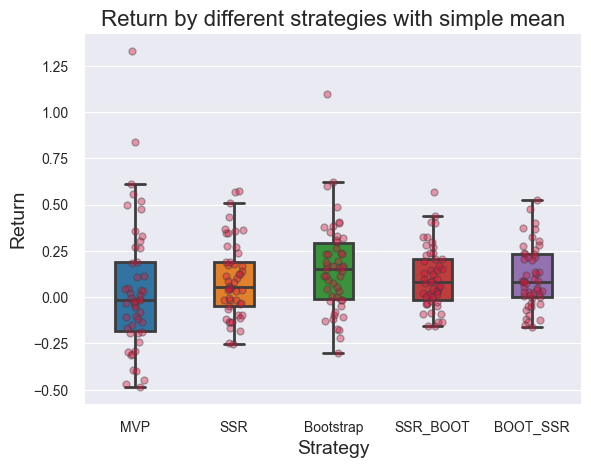

In [8]:
plot("Return","simple mean")

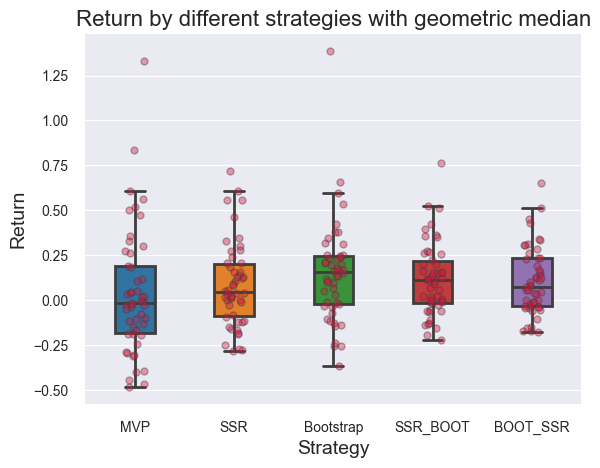

In [9]:
plot("Return","geometric median")

# Sharpe Ratio

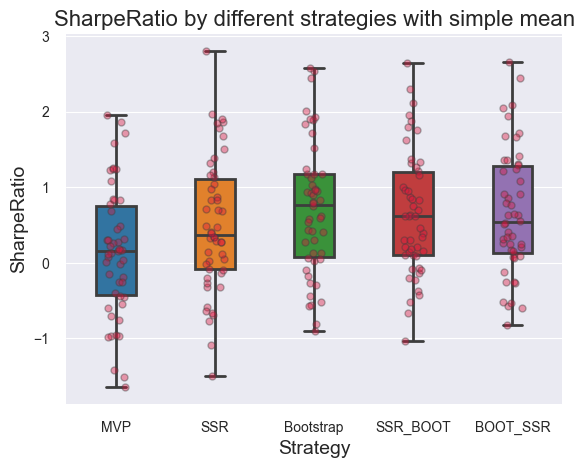

In [10]:
plot("SharpeRatio")

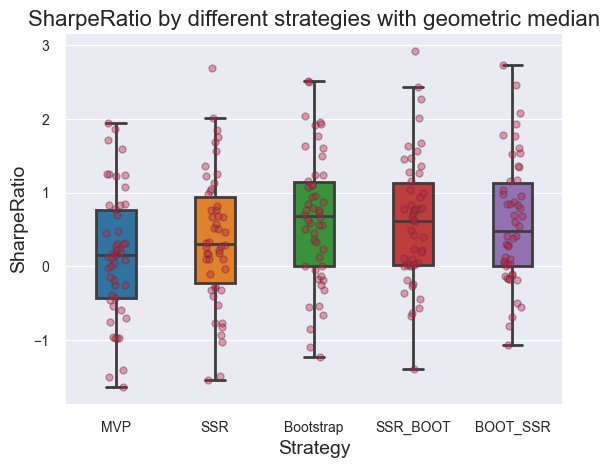

In [11]:
plot("SharpeRatio","geometric median")

# Volatility

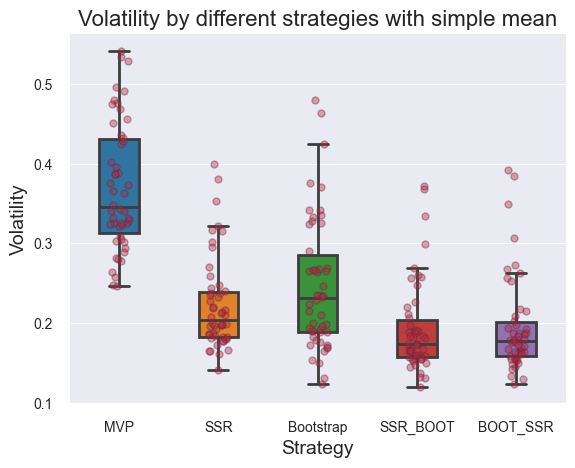

In [12]:
plot("Volatility")

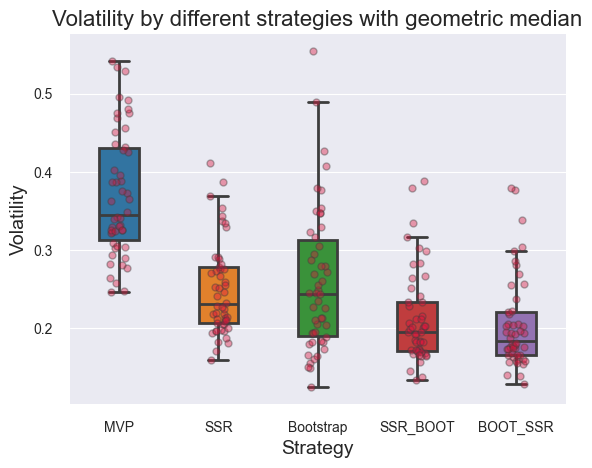

In [13]:
plot("Volatility","geometric median")

# Turnover Rate

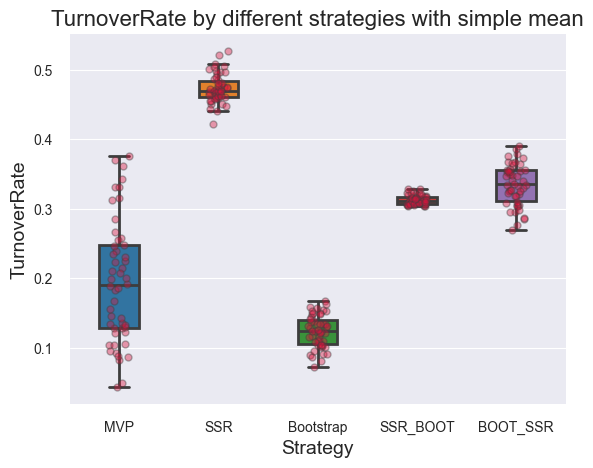

In [14]:
plot("TurnoverRate")

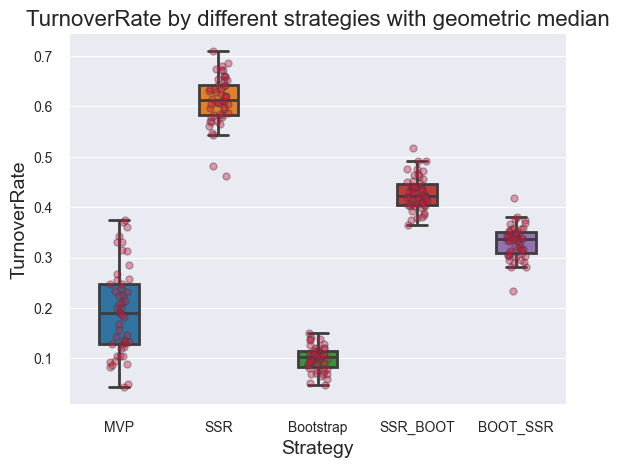

In [15]:
plot("TurnoverRate","geometric median")

# Maximum Drawdown

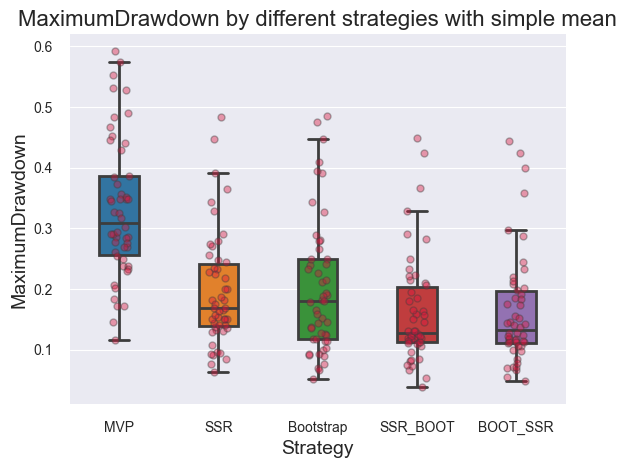

In [16]:
plot("MaximumDrawdown")

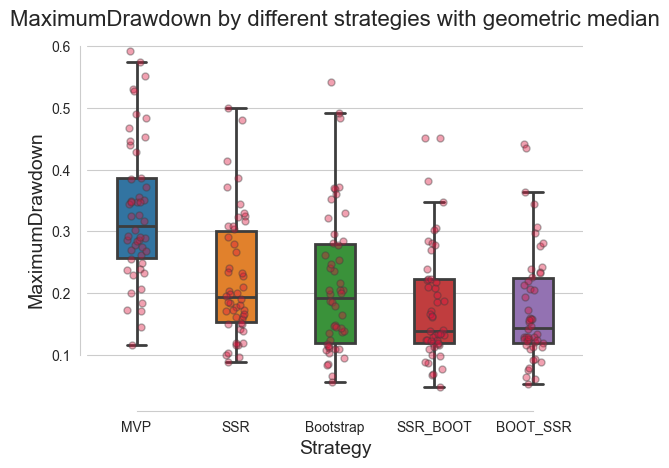

In [212]:
plot("MaximumDrawdown","geometric median")